<a href="https://colab.research.google.com/github/Yun-8bit/Assignment-3-Week-/blob/main/10%EC%A3%BC%EC%B0%A8_%EA%B3%BC%EC%A0%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/50, MSE: 10.5768, MAPE: 890.78%
Epoch 2/50, MSE: 10.1640, MAPE: 858.27%
Epoch 3/50, MSE: 9.7708, MAPE: 826.63%
Epoch 4/50, MSE: 9.3961, MAPE: 795.81%
Epoch 5/50, MSE: 9.0389, MAPE: 765.80%
Epoch 6/50, MSE: 8.6983, MAPE: 736.56%
Epoch 7/50, MSE: 8.3733, MAPE: 708.07%
Epoch 8/50, MSE: 8.0632, MAPE: 680.30%
Epoch 9/50, MSE: 7.7672, MAPE: 653.22%
Epoch 10/50, MSE: 7.4845, MAPE: 626.81%
Epoch 11/50, MSE: 7.2145, MAPE: 601.06%
Epoch 12/50, MSE: 6.9565, MAPE: 575.93%
Epoch 13/50, MSE: 6.7099, MAPE: 551.41%
Epoch 14/50, MSE: 6.4742, MAPE: 527.48%
Epoch 15/50, MSE: 6.2487, MAPE: 504.12%
Epoch 16/50, MSE: 6.0331, MAPE: 481.31%
Epoch 17/50, MSE: 5.8268, MAPE: 459.04%
Epoch 18/50, MSE: 5.6294, MAPE: 437.29%
Epoch 19/50, MSE: 5.4405, MAPE: 416.04%
Epoch 20/50, MSE: 5.2596, MAPE: 395.31%
Epoch 21/50, MSE: 5.0864, MAPE: 375.06%
Epoch 22/50, MSE: 4.9205, MAPE: 355.29%
Epoch 23/50, MSE: 4.7615, MAPE: 335.99%
Epoch 24/50, MSE: 4.6093, MAPE: 317.19%
Epoch 25/50, MSE: 4.4634, MAPE: 298.88%
Epoch 2

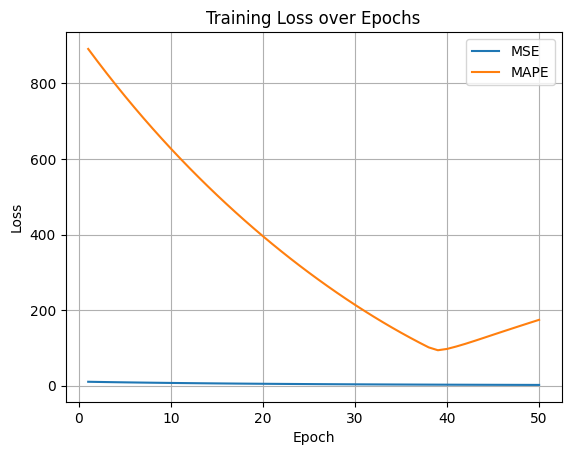

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)
samples = 1000

x1 = np.random.uniform(0, 1, samples)
x2 = np.random.uniform(0, 1, samples)

input = np.column_stack((x1, x2))

y = 2 * x1 + 3 * x2 - 1

# Sigmoid 함수와 그 도함수
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Loss 함수: MSE와 MAPE
def mean_squared_error(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100

# 하이퍼파라미터
input_dim = 2
hidden_dim = 4
output_dim = 1
learning_rate = 0.01
epochs = 50

# 가중치 초기화
W1 = np.random.randn(input_dim, hidden_dim)
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, output_dim)
b2 = np.zeros((1, output_dim))

# 학습
mse_history = []
mape_history = []

for epoch in range(epochs):
    # 순전파
    z1 = np.dot(input, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    y_pred = z2.reshape(-1)  # 출력이 1차원 벡터가 되도록

    # 손실 계산
    mse = mean_squared_error(y, y_pred)
    mape = mean_absolute_percentage_error(y, y_pred)
    mse_history.append(mse)
    mape_history.append(mape)

    # 출력
    print(f"Epoch {epoch+1}/{epochs}, MSE: {mse:.4f}, MAPE: {mape:.2f}%")

    # 역전파
    dz2 = (y_pred - y).reshape(-1, 1)  # (1000, 1)
    dW2 = np.dot(a1.T, dz2) / samples
    db2 = np.sum(dz2, axis=0, keepdims=True) / samples

    da1 = np.dot(dz2, W2.T)
    dz1 = da1 * sigmoid_derivative(z1)
    dW1 = np.dot(X.T, dz1) / samples
    db1 = np.sum(dz1, axis=0, keepdims=True) / samples

    # 가중치 업데이트
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1

# 손실 그래프
plt.plot(range(1, epochs + 1), mse_history, label='MSE')
plt.plot(range(1, epochs + 1), mape_history, label='MAPE')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss over Epochs')
plt.legend()
plt.grid(True)
plt.show()
